## 1. 线性回归实例

In [1]:
import torch
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(torch.__version__)
print(torch.cuda.is_available())

1.8.1+cu101
True


## 2. 读取数据集

In [2]:
data = pd.read_csv("../小型CSV数据/Income1.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  30 non-null     int64  
 1   Education   30 non-null     float64
 2   Income      30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [3]:
data

,Unnamed: 0,Education,Income
0,1,10.000000,26.658839
1,2,10.401338,27.306435
2,3,10.842809,22.132410
3,4,11.244147,21.169841
4,5,11.645485,15.192634
5,6,12.086957,26.398951
6,7,12.488294,17.435307
7,8,12.889632,25.507885
8,9,13.290970,36.884595
9,10,13.732441,39.666109


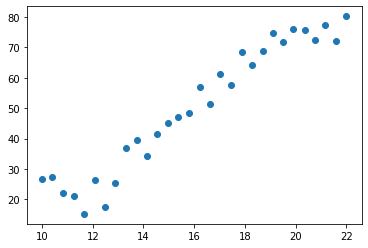

In [4]:
plt.scatter(data.Education, data.Income)

In [5]:
from torch import nn
# 将numpy数据类型转换为tensor：torch.from_numpy()
X = torch.from_numpy(data.Education.values.reshape(-1, 1).astype(np.float32))
Y = torch.from_numpy(data.Income.values.reshape(-1, 1).astype(np.float32))

## 3. 创建模型

In [6]:
# in_features和out_features分别代表输入的数据的长度和输出的数据的长度
model = nn.Linear(in_features=1, out_features=1) # output = w * input + b <===> model(input)
loss_func = nn.MSELoss() # nn.MSELoss()返回一个可调用的对象
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.0001)

for epoch in range(5000):
    for x, y in zip(X, Y):
        y_pred = model(x) # 使用模型做出预测
        loss = loss_func(y, y_pred) # 计算损失
        optimizer.zero_grad() # 把变量的梯度清零
        loss.backward() # 求解梯度
        optimizer.step() # 更新模型参数

In [12]:
model.weight

Parameter containing:
tensor([[4.9755]], requires_grad=True)

In [13]:
model.bias

Parameter containing:
tensor([-28.3873], requires_grad=True)

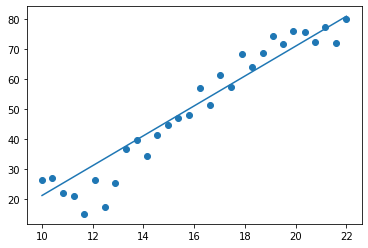

In [7]:
# model(X)得到的是所有的结果，包括梯度等，因此为了得到预测的结果，使用model(X).data，这是tensor格式的
plt.plot(X.numpy(), model(X).data.numpy())
plt.scatter(data.Education, data.Income)